<a href="https://colab.research.google.com/github/Turbo9910/coursera-test/blob/main/Titanic_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic DataSet




**Loading the DataSet**

In [11]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Titanic-Dataset.csv')

**Find datatypes of each feature of the given dataset**


In [16]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


**Basic Preprocessing**

In [19]:

# Describes the data in the dataframe (numeric data)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# For description of non-numeric data too
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [22]:
# Finding the percentage of missing values in each column
values_missing = df.isna().sum()

missing_percentage = (df.isna().sum() / len(df)) * 100

missing = pd.DataFrame({'Missing Values': values_missing, 'Percentage': missing_percentage})
print(missing)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                     177   19.865320
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   687   77.104377
Embarked                  2    0.224467


In [27]:
# Finding the duplicated rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


**Applying Binning**

In [28]:
# Binning 'Age' column into categories
bins = [0, 12, 19, 35, 60,100]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged','Senior']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print("\nBinned Age Groups:\n", df[['Age', 'Age Group']])


Binned Age Groups:
       Age    Age Group
0    22.0        Adult
1    38.0  Middle-Aged
2    26.0        Adult
3    35.0        Adult
4    35.0        Adult
..    ...          ...
886  27.0        Adult
887  19.0         Teen
888   NaN          NaN
889  26.0        Adult
890  32.0        Adult

[891 rows x 2 columns]


**1. A histogram of the age column before and after binning.**

**2. A box plot of the fare column to identify outliers.**

**3. A scatter plot of age vs. fare colored by survived.**

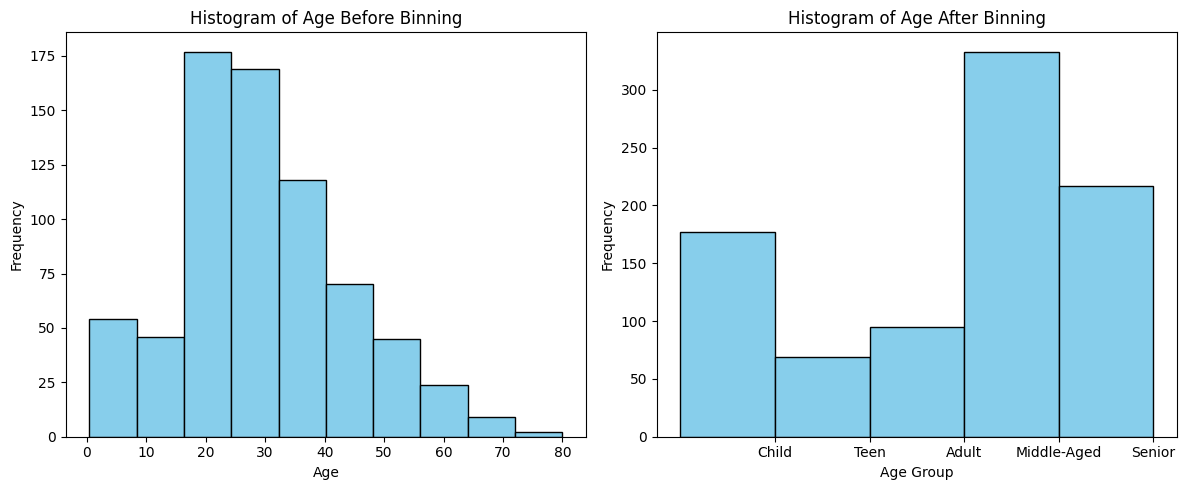

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Histogram before binning
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Age Before Binning')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram After binning
plt.subplot(1, 2, 2)
plt.hist(df['Age Group'].cat.codes, bins=len(labels), edgecolor='black', color='skyblue')
plt.title('Histogram of Age After Binning')
plt.xlabel('Age Group')
plt.ylabel('Frequency')


plt.xticks(range(len(labels)), labels)

plt.tight_layout()
plt.show()

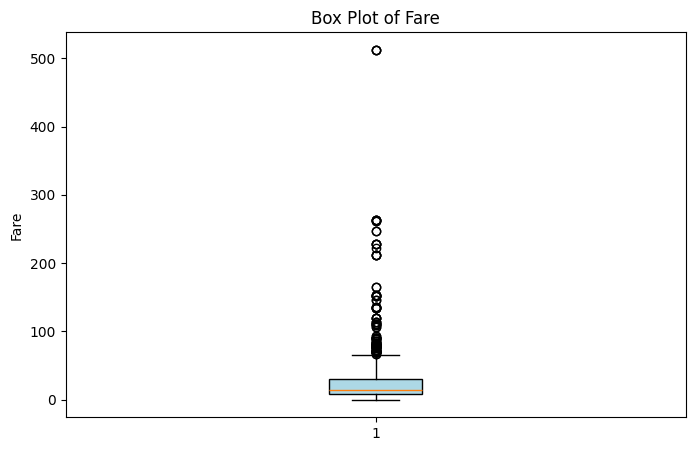

In [49]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Fare'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.show()

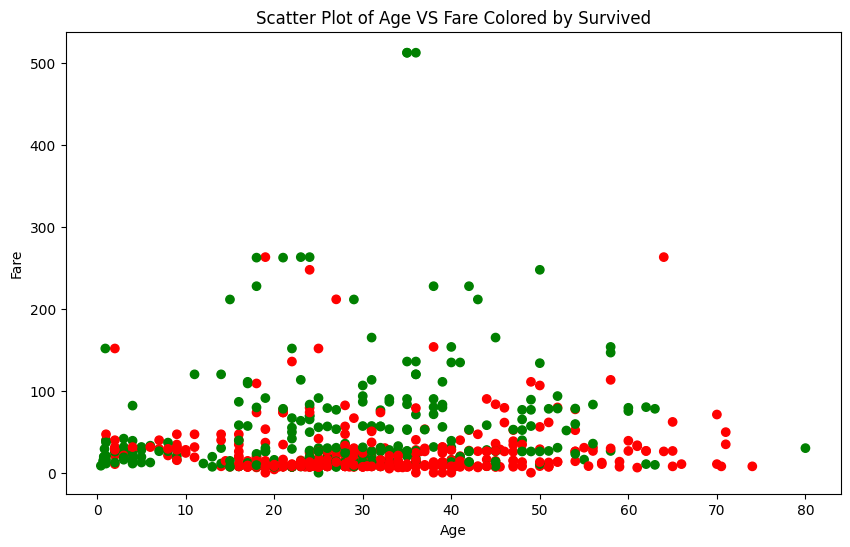

In [56]:
plt.figure(figsize=(10, 6))
colors = df['Survived'].map({0: 'red', 1: 'green'})
scatter = plt.scatter(df['Age'], df['Fare'], c=colors)


plt.title('Scatter Plot of Age VS Fare Colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')



plt.show()

**Apply basic K-means using built in functions on (age,fare)**





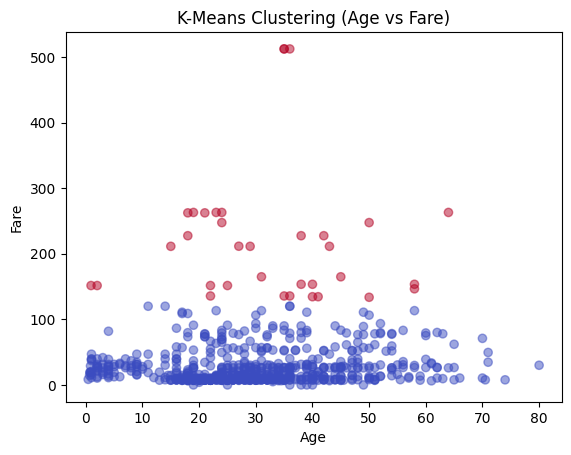

In [89]:
features = ['Age', 'Fare', 'Pclass']

# Apply K-Means clustering (without scaling)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[features])



plt.scatter(df['Age'], df['Fare'], c=df['Cluster'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Means Clustering (Age vs Fare)')
plt.show()

In [100]:
x = df['Age']
y = df['Fare']
data = list(zip(x, y))
print(data)


[(22.0, 7.25), (38.0, 71.2833), (26.0, 7.925), (35.0, 53.1), (35.0, 8.05), (54.0, 51.8625), (2.0, 21.075), (27.0, 11.1333), (14.0, 30.0708), (4.0, 16.7), (58.0, 26.55), (20.0, 8.05), (39.0, 31.275), (14.0, 7.8542), (55.0, 16.0), (2.0, 29.125), (31.0, 18.0), (35.0, 26.0), (34.0, 13.0), (15.0, 8.0292), (28.0, 35.5), (8.0, 21.075), (38.0, 31.3875), (19.0, 263.0), (40.0, 27.7208), (66.0, 10.5), (28.0, 82.1708), (42.0, 52.0), (21.0, 8.05), (18.0, 18.0), (14.0, 11.2417), (40.0, 9.475), (27.0, 21.0), (3.0, 41.5792), (19.0, 7.8792), (18.0, 17.8), (7.0, 39.6875), (21.0, 7.8), (49.0, 76.7292), (29.0, 26.0), (65.0, 61.9792), (21.0, 10.5), (28.5, 7.2292), (5.0, 27.75), (11.0, 46.9), (22.0, 7.2292), (38.0, 80.0), (45.0, 83.475), (4.0, 27.9), (29.0, 10.5), (19.0, 8.1583), (17.0, 7.925), (26.0, 8.6625), (32.0, 10.5), (16.0, 46.9), (21.0, 73.5), (26.0, 14.4542), (32.0, 56.4958), (25.0, 7.65), (0.83, 29.0), (30.0, 12.475), (22.0, 9.0), (29.0, 9.5), (28.0, 47.1), (17.0, 10.5), (33.0, 15.85), (16.0, 34.3

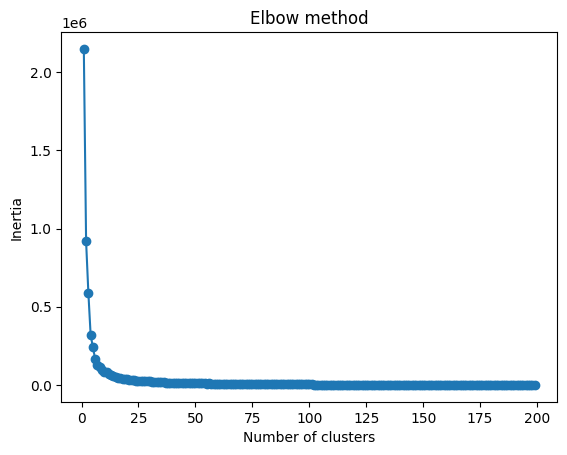

In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = list(zip(x, y))
inertias = []

for i in range(1,200):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,200), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

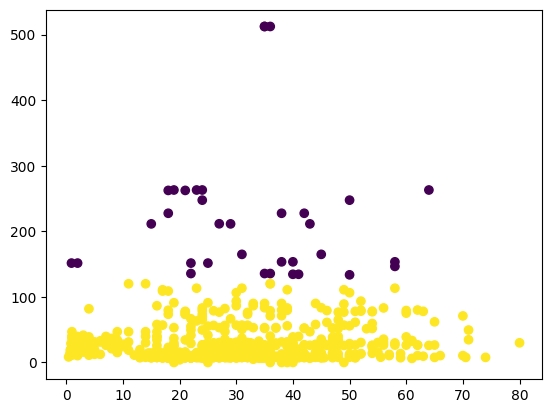

In [102]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

**K-means from scratch using euclidean distance**

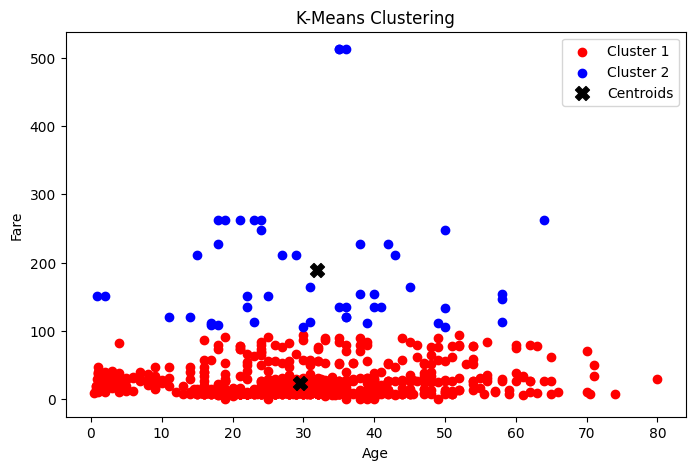

In [103]:
# K-Means from Scratch using Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def k_means(df, k, max_iters=100):
    data = df[['Age', 'Fare']].values
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]

        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Run K-Means with k=2
k = 2
centroids, clusters = k_means(df, k)

# Plot Clusters
plt.figure(figsize=(8, 5))
colors = ['r', 'b']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    if len(cluster) > 0:
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("K-Means Clustering")
plt.legend()
plt.show()
